# Social Computing - Summer 2019

# Exercise 2 - Centrality
Centrality is a key concept in social network analysis. It measures the importance or influence of a certain node/edge in a network. The interpretation of importance or influence, however, depends on the type of centrality and the application for which it is measured. Different types of centrality were discussed in the lecture: degree centrality, closeness centrality, betweenness centrality and eigenvector centrality.<br>
In this exercise, you are going to implement different centrality algorithms using the igraph library which you already know from last exercise. You can find its manual [here](https://igraph.org/python/doc/igraph-module.html) and a tutorial [here](https://igraph.org/python/doc/tutorial/tutorial.html).

## Introduction Problem: The Krackhardt Kite Graph
We will use the Krackhardt Kite for the first exercise. As you know from exercise 1, the Krackhardt Kite is a simple connected, unweighted and undirected graph. [This figure](https://en.wikipedia.org/wiki/Krackhardt_kite_graph#/media/File:Krackhard_kite.PNG) illustrates the Krackhardt Kite.

**Calculate the degree centrality of the Krackhardt Kite graph - just a list of ten values, one for each node. You can use the pre-defined function of the igraph library.**

**Optional:** Look at the graph and the list with the degree centrality values. Can you identify which node has which degree centrality?<br>
**Optional:** Calculate the closeness and betweeness centrality as well. What information do they give us?

Degree centrality of the Kite:  [4, 4, 3, 6, 3, 5, 5, 3, 2, 1]


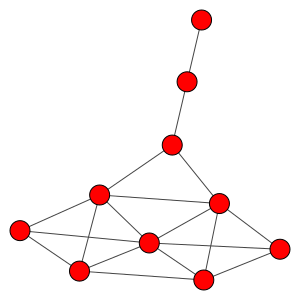

In [1]:
import igraph as ig

# Importing the graph (connected, unweighted, undirected social network)
krackhardt_kite = ig.Graph.Famous('Krackhardt_Kite')

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 20
visual_style['bbox'] = (300, 300)
visual_style['margin'] = 20

# TODO: Calculate the Kite's degree centrality
print("Degree centrality of the Kite: ", krackhardt_kite.degree())

# TODO: Plot the graph
ig.plot(krackhardt_kite, **visual_style)

Degree centrality of the Kite:  [4, 4, 3, 6, 3, 5, 5, 3, 2, 1]


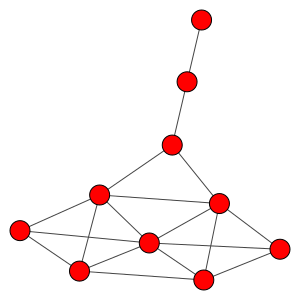

In [2]:
import igraph as ig
g = ig.Graph.Famous('Krackhardt_Kite')
def degree_centrality(g):
    # TODO: Implement the degree centrality
    degree = []
    for v in range(g.vcount()):
        neighbor = g.neighbors(vertex=v)
        degree.append(len(neighbor))
        v+=1
    return degree
    
# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 20
visual_style['bbox'] = (300, 300)
visual_style['margin'] = 20

# TODO: Calculate the Kite's degree centrality
print("Degree centrality of the Kite: ", degree_centrality(g))

# TODO: Plot the graph
ig.plot(g, **visual_style)

## Problem 2.1: Degree Centrality
In the following three problems, you are working with an anonymized real-life social network from [1] represented in the file _UniversityNetwork.graphml_. It represents the faculty of a university, consisting of individuals (vertices) and their directed and weighted connections (edges). The nodes have attributes (which faculty the person is affiliated with), but we will neglect that information. The edges' weights are a measure of friendship between the persons.

**Your task in this exercise is to read in the graph and to calculate the degree centrality of all the nodes in it. Plot the graph as well.** You are **not allowed** to use the pre-defined function `degree()` but have to implement your own. The output should be a list of integers - nodes with a centrality of 0 do not need to be listed, but can be. 

[1] T. Nepusz et al: _Fuzzy communities and the concept of bridgeness in complex networks._ Physical Review E 77:016107, 2008.

**Notes:**
* Degree centrality of a graph node is the number of edges (incoming and outgoing) of that node.
* The functions `Read_GraphML()` and `are_connected()` might help you with the task.

Degree Centralities of the University Network:  [15, 36, 8, 18, 38, 17, 35, 8, 13, 35, 2, 19, 26, 12, 29, 19, 14, 22, 24, 21, 38, 20, 22, 9, 13, 20, 37, 12, 62, 10, 35, 10, 27, 17, 28, 10, 54, 21, 20, 19, 12, 29, 33, 6, 12, 30, 12, 14, 26, 20, 24, 39, 10, 26, 11, 10, 24, 25, 11, 5, 16, 43, 9, 13, 10, 8, 6, 27, 37, 18, 13, 19, 4, 13, 14, 13, 44, 6, 22, 15, 10]


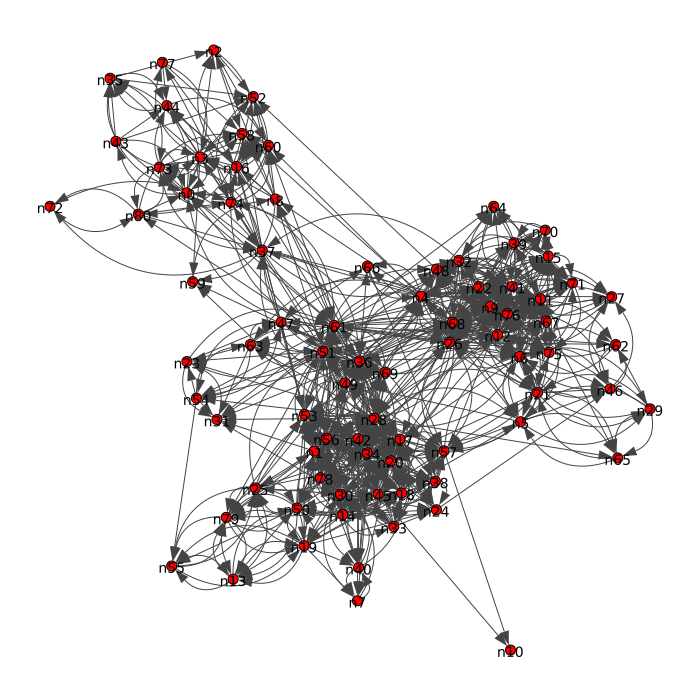

In [4]:
from igraph import *

# Calculates degree centrality for a graph g
def degree_centrality(g):
    # TODO: Implement the degree centrality
    degree = []
    for v in range(g.vcount()):
        neighbor = g.neighbors(vertex=v)
        degree.append(len(neighbor))
        v+=1
    return degree

# TODO: Import the graph
g = Graph.Read_GraphML("UniversityNetwork.graphml")

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 10
visual_style['vertex_label'] = g.vs['id']
visual_style['bbox'] = (700, 700)
visual_style['margin'] = 50

# TODO: Calculate the degree centrality
print("Degree Centralities of the University Network: ",degree_centrality(g))

# TODO: Plot the graph
ig.plot(g, **visual_style)

## Problem 2.2: Closeness Centrality

Now we want to take a closer look at the closeness centrality for the given network. It measures how close a node is to other nodes in the graph. This is calculated via the sum of distances from that node to all the other nodes in the graph.

**Write a Python program that computes the closeness centrality for each node for the given social network.** The output should be a list where each item contains the value of the closeness centrality of a node. You are **not allowed** to use the pre-defined function `closeness()` , but you can use it as an inspiration.

**Notes:**
* The formula for the closeness centrality can be found in the lecture or exercise slides.
* Calculating the shortest paths is a common problem, maybe there is a pre-defined function for that?
* The edges of the graph have weights which you need to take into account for shortest paths calculation.
* You can print the node ID list with: `print(g.vs['id'])`
* You can print the edge list with: `print(g)`

In [5]:
from igraph import *
import numpy as np
# Calculates the closeness centrality for a graph g
def closeness_centrality(g):
    # TODO: Calculate shortest paths list for each node
    weights = g.es["weight"]
    shortest_paths = g.shortest_paths_dijkstra(weights=weights, mode = ALL)
    # TODO: Calculate closeness centrality for each node
    ave_sp = np.mean(shortest_paths, axis=1)
    closeness = np.divide(1.0, ave_sp)
    return closeness

# TODO: Calculate closeness centrality
print("Closeness Centralities of the University Network: \n", closeness_centrality(g))

Closeness Centralities of the University Network: 
 [0.35371179 0.41326531 0.31764706 0.37327189 0.41968912 0.38571429
 0.41326531 0.34033613 0.42857143 0.42631579 0.2967033  0.34322034
 0.35064935 0.3266129  0.38028169 0.39901478 0.38942308 0.41538462
 0.32793522 0.39901478 0.35371179 0.38942308 0.39512195 0.35371179
 0.33333333 0.36986301 0.39130435 0.35371179 0.421875   0.31640625
 0.34615385 0.39901478 0.34763948 0.39705882 0.39901478 0.2755102
 0.49693252 0.41968912 0.37155963 0.41326531 0.38028169 0.38207547
 0.36651584 0.35217391 0.34763948 0.26644737 0.30566038 0.38942308
 0.39512195 0.3253012  0.38388626 0.4009901  0.34913793 0.43548387
 0.40909091 0.29347826 0.39512195 0.41326531 0.35840708 0.36
 0.39130435 0.49693252 0.29347826 0.33196721 0.38207547 0.3253012
 0.34913793 0.34177215 0.4009901  0.39512195 0.2755102  0.36986301
 0.23076923 0.28125    0.34763948 0.37155963 0.41326531 0.29779412
 0.40909091 0.36651584 0.35526316]


## Problem 2.3: Betweenness Centrality

Betweenness centrality also measures centrality based on shortest paths. For every pair of vertices in a graph, there exists a shortest path between the vertices such that either the number of edges that the path passes through (for undirected graphs) or the edges' sum of the weights (for directed graphs) is minimized.<br>
Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

**Calculate the betweenness centrality with the help of the pre-defined function in the igraph library. Interpret the resulting values based on two exemplary nodes.** To do that, pick two nodes and explain how their betweenness centrality links to the graph structure. Name the two nodes that you discussed (and their betweenness centrality). Do not write more than 5 sentences.

In [6]:
# TODO: Calculate the betweenness centrality (using the pre-defined function is fine)
g.betweenness(vertices=None, directed=True, cutoff=None, weights=None, nobigint=True)

[301.80581357076716,
 236.99784342560295,
 3.9797186147186143,
 177.68360953790446,
 330.1655117660822,
 113.52023881872006,
 295.4629219585366,
 0.0,
 182.0059115885499,
 260.89773771993964,
 0.0,
 13.70279651362362,
 84.00295378488609,
 4.487128272054742,
 20.242980244318577,
 13.828941144588965,
 334.8711802963119,
 21.045076779439338,
 29.12282920470981,
 54.99366845983247,
 228.3169305603915,
 129.96490629363615,
 15.87135317155981,
 98.4613429623412,
 24.883730978981625,
 146.7599845643532,
 239.76792874065987,
 5.723030186188081,
 1046.3503921545982,
 8.211132042560612,
 185.3175358881936,
 3.417857142857143,
 154.45666084643483,
 4.3021564796838305,
 69.50564951556642,
 10.752380952380953,
 730.1707891468012,
 434.0521500804741,
 31.57199711459995,
 12.835968767305094,
 3.410965745373856,
 86.95711699698322,
 72.48371594601666,
 0.25,
 12.026099227569816,
 124.3304760593442,
 22.1487391221845,
 56.86222941024572,
 113.57845181602143,
 78.45263159523398,
 113.79999007187064,
 36

**TODO: Write your discussion here!**

Based on the idea that information flows primarily through the shortest path between them, the betweenness centrality represents the effect of the vertices on the flow of information between each pair of vertices.

The betweenness centrality measures the number of times the shortest path between two nodes passes the investigated node divided by the total number of shortest paths between the two nodes.  

For example, the betweenness centralities of the first two nodes are 301.80581357076716 and 236.99784342560295.

As we see, the first node has a higher value than the second one.

This means that the first node has a higher influence over the flow of information than the other one.